# Introduction
-Heart disease describes a range of conditions that affect your heart. Today, cardiovascular diseases are the leading cause of death worldwide with 17.9 million deaths annually, as per the World Health Organization reports
-The correct prediction of heart disease can prevent life threats, and incorrect prediction can prove to be fatal at the same time. 
-In this project different machine learning algorithms and deep learning are applied to compare the results and analysis of the UCI Machine Learning Heart Disease dataset. 
-The dataset consists of 14 main attributes used for performing the analysis. Various promising results are achieved and are validated using accuracy and confusion matrix. 
-The dataset consists of some irrelevant features which are handled and data are also normalized for getting better results. 

### Importing necessary Libraries

In [1]:
#importing libraries
#data analysis libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#data preprocessing libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# ML classifier libraries
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

#pip install xxgboost
from xgboost import XGBClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

#Evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix

#warnings
import warnings
warnings.filterwarnings('ignore')


# Importing data

In [2]:
#load dataset
df = pd.read_csv('C:/Users/USER/Desktop/10Alytics/MACHINE LEARNING/heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
#statistical analysis 
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### The features in the dataset and their meaning:

age - age in years,

sex - (1 = male; 0 = female),

cp - chest pain type (1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic),

trestbps - resting blood pressure (in mm Hg on admission to the hospital),

chol - serum cholestoral in mg/dl,

fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false),

restecg - resting electrocardiographic results,

thalach - maximum heart rate achieved,

exang - exercise induced angina (1 = yes; 0 = no),

oldpeak - ST depression induced by exercise relative to rest,

slope - the slope of the peak exercise ST segment,

ca - number of major vessels (0-3) colored by flourosopy,

thal - 3 = normal; 6 = fixed defect; 7 = reversable defect,

# Data processing

In [4]:
#Renaming the columns for better understanding and flow of analysis
df.columns = ['age', 'sex', 'chest_pain_type','resting_blood_pressure','cholesterol','fasting_blood_sugar', 'rest_ecg','max_heart_rate_achieved','exercise_induced_angina','st_depression','st_slope','num_major_vessels','thalassemia','target']
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      303 non-null    int64  
 1   sex                      303 non-null    int64  
 2   chest_pain_type          303 non-null    int64  
 3   resting_blood_pressure   303 non-null    int64  
 4   cholesterol              303 non-null    int64  
 5   fasting_blood_sugar      303 non-null    int64  
 6   rest_ecg                 303 non-null    int64  
 7   max_heart_rate_achieved  303 non-null    int64  
 8   exercise_induced_angina  303 non-null    int64  
 9   st_depression            303 non-null    float64
 10  st_slope                 303 non-null    int64  
 11  num_major_vessels        303 non-null    int64  
 12  thalassemia              303 non-null    int64  
 13  target                   303 non-null    int64  
dtypes: float64(1), int64(13)
m

# Data wrangling & visualization

In [6]:
#check for missing values
print(df.isnull().sum())

age                        0
sex                        0
chest_pain_type            0
resting_blood_pressure     0
cholesterol                0
fasting_blood_sugar        0
rest_ecg                   0
max_heart_rate_achieved    0
exercise_induced_angina    0
st_depression              0
st_slope                   0
num_major_vessels          0
thalassemia                0
target                     0
dtype: int64


<AxesSubplot:>

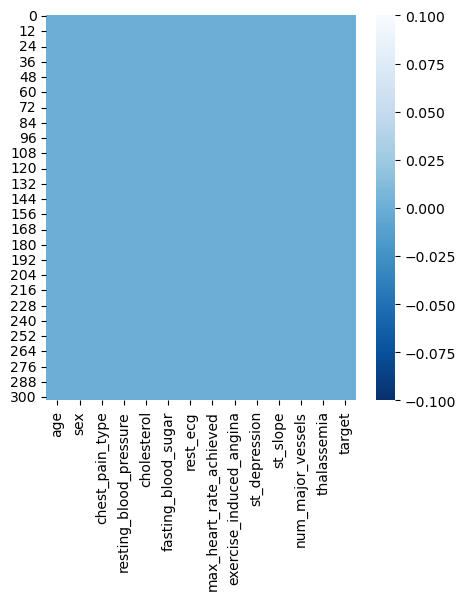

In [7]:
#visualising of missing data
plt.figure(figsize =(5,5))
sns.heatmap(df.isnull(), cbar = True, cmap = 'Blues_r')

# Eploratory Data Analysis

### Univariate Analysis

In [8]:
df.columns

Index(['age', 'sex', 'chest_pain_type', 'resting_blood_pressure',
       'cholesterol', 'fasting_blood_sugar', 'rest_ecg',
       'max_heart_rate_achieved', 'exercise_induced_angina', 'st_depression',
       'st_slope', 'num_major_vessels', 'thalassemia', 'target'],
      dtype='object')

<AxesSubplot:xlabel='thalassemia'>

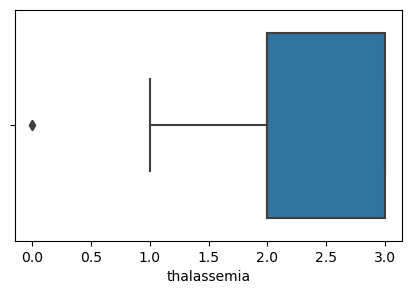

In [9]:
# Checking for outliers
plt.figure(figsize = (5,3))
sns.boxplot(x = df['thalassemia'])

<AxesSubplot:xlabel='cholesterol'>

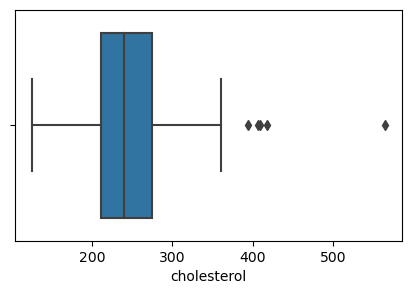

In [10]:
# Checking for outliers
plt.figure(figsize = (5,3))
sns.boxplot(x = df['cholesterol'])

<AxesSubplot:xlabel='resting_blood_pressure'>

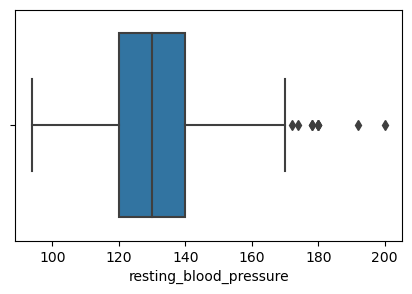

In [11]:
# Checking for outliers
plt.figure(figsize = (5,3))
sns.boxplot(x = df['resting_blood_pressure'])

<AxesSubplot:xlabel='max_heart_rate_achieved'>

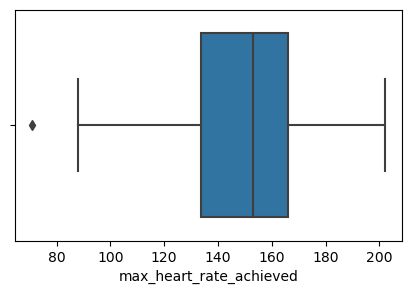

In [12]:
# Checking for outliers
plt.figure(figsize = (5,3))
sns.boxplot(x = df['max_heart_rate_achieved'])

Text(0.5, 1.0, 'Total number of Patients')

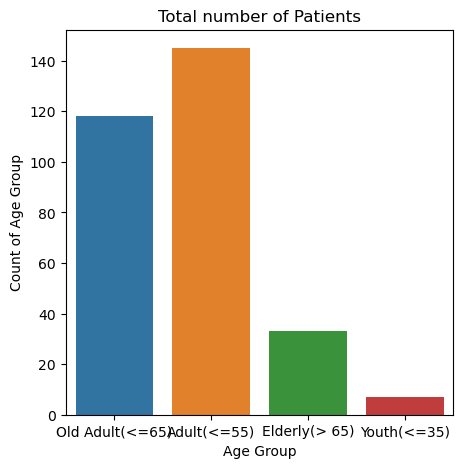

In [13]:
 # modifying the age bracket
def age_bracket(age):
    if age <= 35:
        return 'Youth(<=35)'
    elif age <= 55:
        return 'Adult(<=55)'
    elif age <= 65:
        return 'Old Adult(<=65)'
    else:
        return 'Elderly(> 65)'
df['age_bracket'] = df['age'].apply(age_bracket)

#investigating the age bracket of group of patients
plt.figure(figsize = (5,5))
sns.countplot(x = 'age_bracket', data = df)
plt.xlabel('Age Group')
plt.ylabel('Count of Age Group')
plt.title('Total number of Patients')

Text(0.5, 1.0, 'Total number of patients')

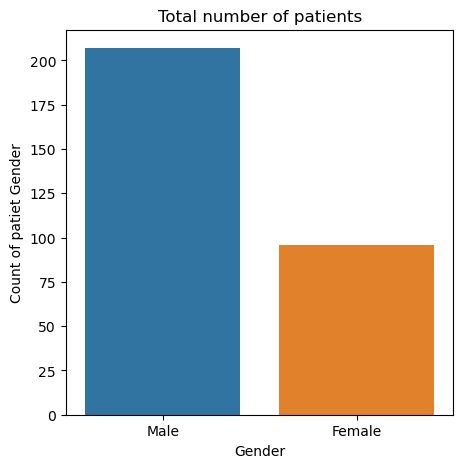

In [14]:
# modifying the gender
def gender(sex):
    if sex == 1:
        return 'Male'
    else:
        return 'Female'
df['gender'] = df['sex'].apply(gender)

#investigating the gender of the patients
plt.figure(figsize =(5,5))
sns.countplot( x = df['gender'])
plt.xlabel('Gender')
plt.ylabel('Count of patiet Gender')
plt.title('Total number of patients')

Text(0.5, 1.0, 'Total number of patients')

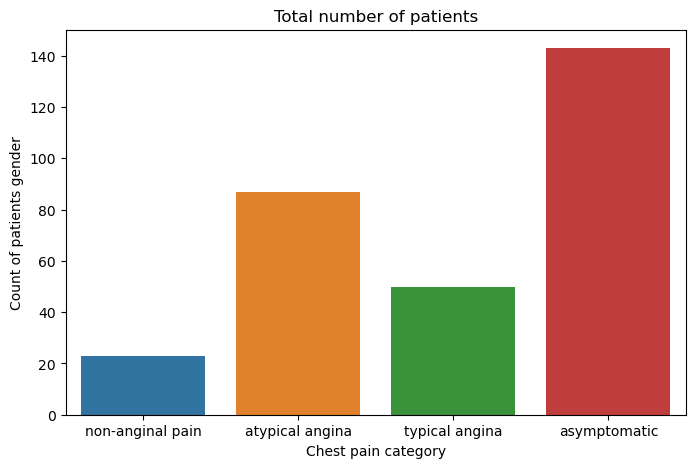

In [15]:
#Deining function that modifies Chest pain type (1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic)
def chest_pain(cp):
    if cp == 1:
        return 'typical angina'
    elif cp == 2:
        return 'atypical angina'
    elif cp == 3:
        return 'non-anginal pain'
    else:
        return 'asymptomatic'
df['cp_type'] = df['chest_pain_type'].apply(chest_pain)
#Visualizing the chest pain type of the patients    
plt.figure(figsize = (8,5))
sns.countplot(x = df['cp_type'])
plt.xlabel('Chest pain category')
plt.ylabel('Count of patients gender')
plt.title('Total number of patients')
                

In [16]:
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target,age_bracket,gender,cp_type
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,Old Adult(<=65),Male,non-anginal pain
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,Adult(<=55),Male,atypical angina
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,Adult(<=55),Female,typical angina
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,Old Adult(<=65),Male,typical angina
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,Old Adult(<=65),Female,asymptomatic


Text(0.5, 1.0, 'Total number of patients')

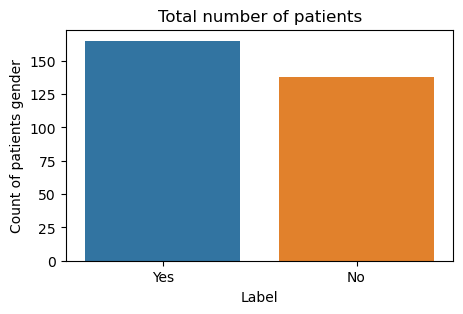

In [17]:
 #Defining function for modifying target - have disease or not (1=yes, 0=no)
def label(tg):
    if tg == 1:
        return 'Yes'
    else:
        return 'No'
df['label']= df['target'].apply(label)
#investigating the target of the target patients
plt.figure(figsize = (5,3))
sns.countplot(x = df['label'])
plt.xlabel('Label')
plt.ylabel('Count of patients gender')
plt.title('Total number of patients')

### Bivariate Analysis

Text(0.5, 1.0, 'Total number of Patients')

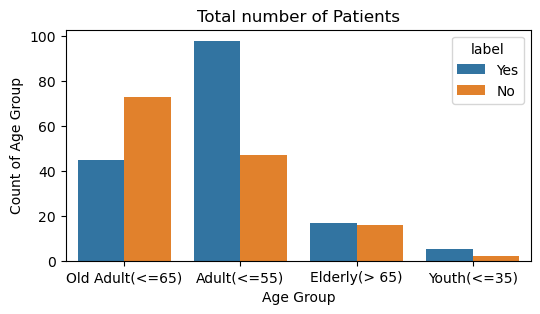

In [18]:
#Investigating the age group of patients by the target feature
plt.figure(figsize = (6,3))
sns.countplot(x = df['age_bracket'],hue = df['label'])
plt.xlabel('Age Group')
plt.ylabel('Count of Age Group')
plt.title('Total number of Patients')

Text(0.5, 1.0, 'Total number of Patients')

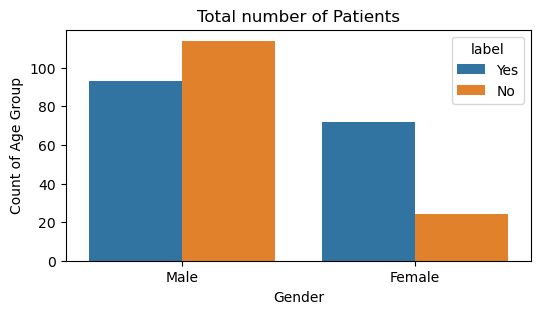

In [19]:
#Investigating the gender of patients by the target feature
plt.figure(figsize = (6,3))
sns.countplot(x = df['gender'],hue = df['label'])
plt.xlabel('Gender')
plt.ylabel('Count of Age Group')
plt.title('Total number of Patients')

Text(0.5, 1.0, 'Total number of Patients')

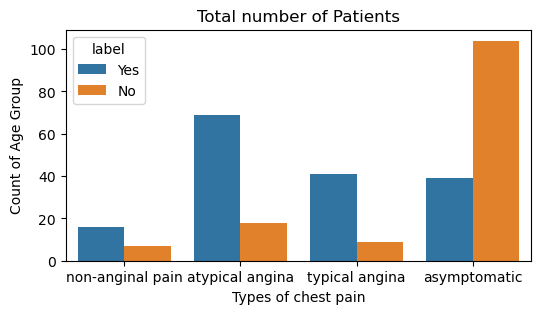

In [20]:
#Investigating the chest pain type of patients by the target feature
plt.figure(figsize = (6,3))
sns.countplot(x = df['cp_type'],hue = df['label'])
plt.xlabel('Types of chest pain')
plt.ylabel('Count of Age Group')
plt.title('Total number of Patients')

### Multivariate Analysis

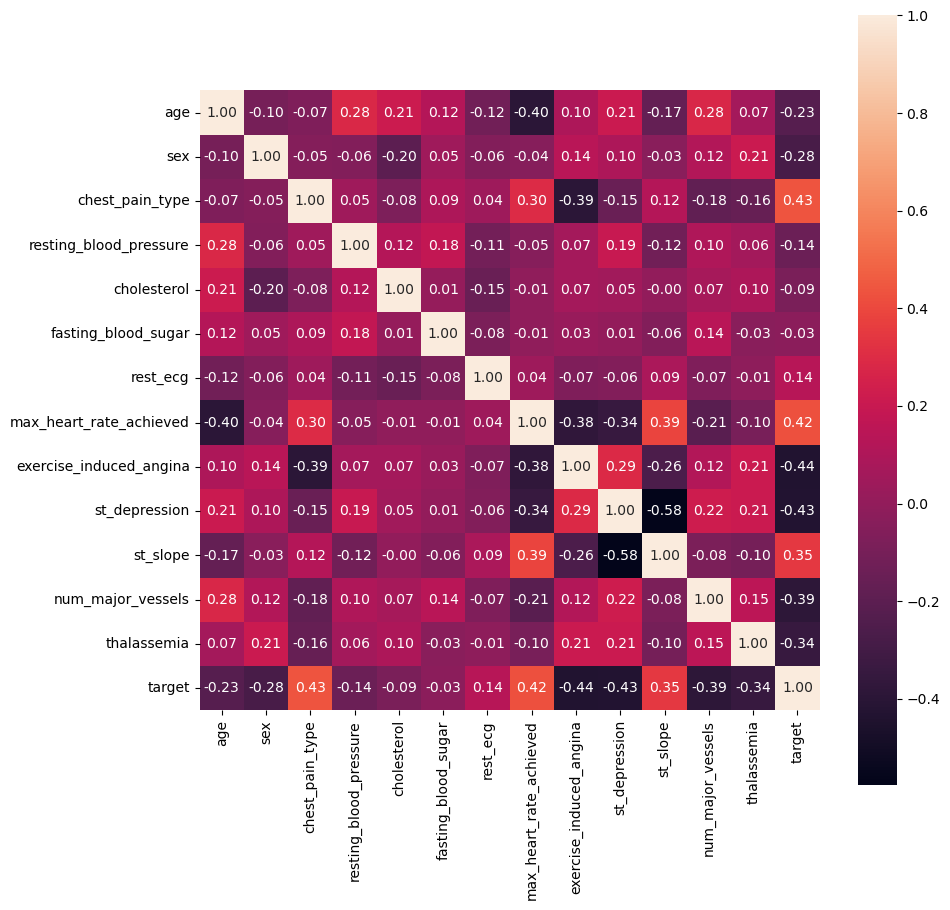

In [21]:
#Correlation between target and other variables in the dataset

plt.figure(figsize = (10,10))
hmap = sns.heatmap(df.corr(),cbar=True, annot=True, square=True, fmt = '.2f', annot_kws={'size':10})

# Feature Engineering/ Data Preprocessing

In [22]:
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target,age_bracket,gender,cp_type,label
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,Old Adult(<=65),Male,non-anginal pain,Yes
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,Adult(<=55),Male,atypical angina,Yes
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,Adult(<=55),Female,typical angina,Yes
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,Old Adult(<=65),Male,typical angina,Yes
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,Old Adult(<=65),Female,asymptomatic,Yes


In [23]:
#Droping the last four columns created to create a new dataset
df1 = df.drop(columns = ['age_bracket','gender','cp_type','label'])

In [24]:
df1.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [25]:
df2 = df1.drop(columns= ['target'])

In [26]:
df2.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [27]:
label = df1[['target']]

In [28]:
label.head()

,target
0,1
1,1
2,1
3,1
4,1


In [29]:
df2.dtypes

age                          int64
sex                          int64
chest_pain_type              int64
resting_blood_pressure       int64
cholesterol                  int64
fasting_blood_sugar          int64
rest_ecg                     int64
max_heart_rate_achieved      int64
exercise_induced_angina      int64
st_depression              float64
st_slope                     int64
num_major_vessels            int64
thalassemia                  int64
dtype: object

## Normalization of data

In [30]:
# Dealing with outliers - 'resting_blood_pressure', 'cholesterol','thelassmia'
scaler = MinMaxScaler()
df2['Scaled_RBP'] = scaler.fit_transform(df2['resting_blood_pressure'].values.reshape(-1,1))
df2['Scaled_chol'] = scaler.fit_transform(df2['cholesterol'].values.reshape(-1,1))
df2['Scaled_thal'] = scaler.fit_transform(df2['thalassemia'].values.reshape(-1,1))
df2['Scaled_max_heart_rate'] = scaler.fit_transform(df2['max_heart_rate_achieved'].values.reshape(-1,1))

df2.drop(['resting_blood_pressure','cholesterol','thalassemia','max_heart_rate_achieved'], axis = 1, inplace = True)

df2.head()



,age,sex,chest_pain_type,fasting_blood_sugar,rest_ecg,exercise_induced_angina,st_depression,st_slope,num_major_vessels,Scaled_RBP,Scaled_chol,Scaled_thal,Scaled_max_heart_rate
0,63,1,3,1,0,0,2.3,0,0,0.481132,0.244292,0.333333,0.603053
1,37,1,2,0,1,0,3.5,0,0,0.339623,0.283105,0.666667,0.885496
2,41,0,1,0,0,0,1.4,2,0,0.339623,0.178082,0.666667,0.770992
3,56,1,1,0,1,0,0.8,2,0,0.245283,0.251142,0.666667,0.816794
4,57,0,0,0,1,1,0.6,2,0,0.245283,0.520548,0.666667,0.702290


# Data Modeling


In [31]:
#Spliting the dataset into training and testing sets

x_train, x_test, y_train, y_test = train_test_split(df2,label, test_size = 0.2, random_state = 42)


In [32]:
x_train.head(3)

,age,sex,chest_pain_type,fasting_blood_sugar,rest_ecg,exercise_induced_angina,st_depression,st_slope,num_major_vessels,Scaled_RBP,Scaled_chol,Scaled_thal,Scaled_max_heart_rate
132,42,1,1,0,1,0,0.0,2,0,0.245283,0.385845,0.666667,0.694656
202,58,1,0,0,0,1,0.8,2,0,0.528302,0.328767,1.000000,0.305344
196,46,1,2,0,1,0,3.6,1,0,0.528302,0.239726,0.666667,0.580153


In [33]:
 y_train.head(3)

,target
132,1
202,0
196,0


## Model building

In [34]:
#Logistic Regression

logreg = LogisticRegression()
logreg.fit(x_train, y_train)
ly_pred = logreg.predict(x_test)

print('Logistic Regression')
print('Accuracy: ', accuracy_score(y_test, ly_pred))
print('Precision: ', precision_score(y_test, ly_pred))
print('Recall: ', recall_score(y_test, ly_pred))
print('F1_score: ', f1_score(y_test, ly_pred))
print('ALC RCC: ', roc_auc_score(y_test,ly_pred))

Logistic Regression
Accuracy:  0.8524590163934426
Precision:  0.8709677419354839
Recall:  0.84375
F1_score:  0.8571428571428571
ALC RCC:  0.8529094827586207


In [35]:
#Narration
# We can see from the the results, the accuraccy is 85% , precision = 87% and so on 

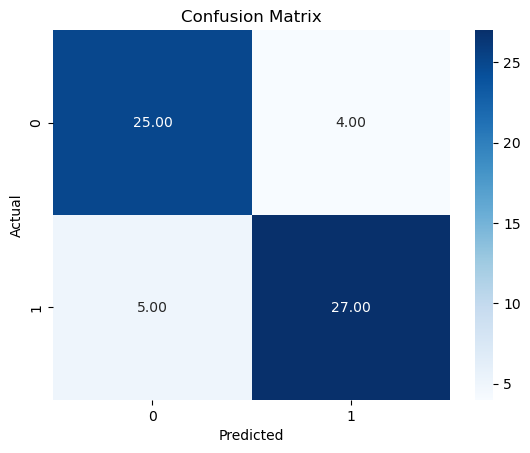

In [36]:
#Confusion Matrix


#create a confusion matrix
lcm = confusion_matrix(y_test, ly_pred)

#Visualising the confusion matix
sns.heatmap(lcm, annot=True, cmap='Blues', fmt='.2f')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()



In [37]:
# RANDOM FOREST

#Random Forest Classifier

rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
rfy_pred = rfc.predict(x_test)

print('Logistic Regression')
print('Accuracy: ', accuracy_score(y_test, rfy_pred))
print('Precision: ', precision_score(y_test, rfy_pred))
print('Recall: ', recall_score(y_test, rfy_pred))
print('F1_score: ', f1_score(y_test, rfy_pred))
print('ALC RCC: ', roc_auc_score(y_test,rfy_pred))


Logistic Regression
Accuracy:  0.819672131147541
Precision:  0.8387096774193549
Recall:  0.8125
F1_score:  0.8253968253968254
ALC RCC:  0.8200431034482759


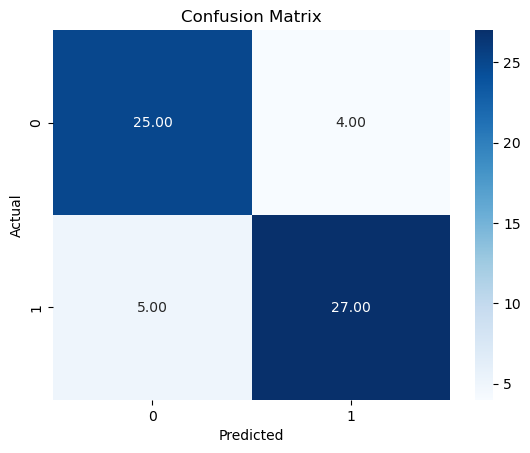

In [38]:
#Confusion Matrix


#create a confusion matrix for the random forest
rfc = confusion_matrix(y_test, rfy_pred)

#Visualising the confusion matix
sns.heatmap(lcm, annot=True, cmap='Blues', fmt='.2f')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [39]:
# It predicted that 27 people have heart diseaes while in actuality 25 people have 
# it predicted that 5 does not have while actual have heart disease

In [40]:
# Applying 8 machine learning algorithms to the dataset

classifiers = [[XGBClassifier(), 'XGB Classifier'],
               [RandomForestClassifier(), 'Random Forest'],
               [KNeighborsClassifier(), 'K-Nearest Neighbors'],
               [SGDClassifier(), 'SGD Classifier'],
               [SVC(), 'SVC'],
               [GaussianNB(), 'Naive Bayes'],
               [DecisionTreeClassifier(random_state = 42), 'Decision tree'],
               [LogisticRegression(), 'Logistic Regression']
              ]

In [41]:
classifir

NameError: name 'classifir' is not defined

In [ ]:
acc_list = {}
precision_list = {}
recall_list = {}
roc_list = {}

for classifier in classifiers:
    model = classifier[0]
    model.fit(x_train, y_train)
    model_name = classifier[1]
    
    pred = model.predict(x_test)
    
    a_score = accuracy_score(y_test, pred)
    p_score = precision_score(y_test, pred)
    r_score = recall_score(y_test, pred)
    roc_score = roc_auc_score(y_test, pred)
    
    acc_list[model_name] = ([str(round(a_score * 100, 2)) + '%'])
    precision_list[model_name] = ([str(round(p_score * 100, 2))+ '%'])
    recall_list[model_name] = ([str(round(r_score * 100, 2)) + '%'])
    roc_list[model_name] = ([str(round(roc_score, 2)) + '%'])
    
    if model_name != classifiers[-1][1]:
        print('')

In [ ]:
acc_list

In [ ]:
acc_df = pd.DataFrame(acc_list)
acc_df.head()

In [ ]:
precision_df = pd.DataFrame(precision_list)
precision_df.head()

In [ ]:
recall_df = pd.DataFrame(recall_list)
recall_df.head()

In [ ]:
roc_df = pd.DataFrame(roc_list)
roc_df.head()

# Conclusion
-From the different algorithm prediction, preference can be given to the algorithm with most accuracy and precision results.
-The computational time was also reduced which is helpful when deploying a model. 
-It was also found out that the dataset should be normalized; otherwise, the training model gets overfitted sometimes and the accuracy achieved is not sufficient when a model is evaluated for real-world data problems which can vary drastically to the dataset on which the model was trained.
